In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import sys
import time

import itertools
import multiprocessing as mp
import copy
import math
from statsmodels.graphics.tsaplots import plot_acf

sys.path.append("/Users/octavia/Dropbox/fire/src" )



from fire_model import *

## Streamplots

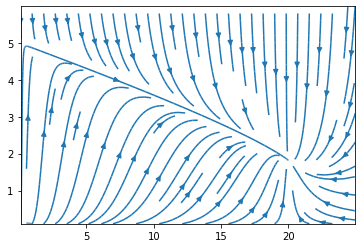

In [2]:
def g_u(p, G_u):
    """
    Upper layer growth rate
    """
    r_u = p.r_u
    k_u = p.k_u
    S = p.S
    
    beta = p.beta
    return r_u*G_u*(1-G_u/k_u)*(S**beta)

def g_l(p,G_u, G_l):
    """
    Upper layer growth rate
    """
    r_l = p.r_l
    k_l = p.k_l
    S = p.S
    beta = p.beta
    return r_l*G_l*(1-G_l/k_l)*(S**beta) - p.alpha*G_l*G_u


p = RCSR({"alpha" : 0.01})
p.run()
G_u = np.arange(0.1, p.k_u+5, .01)
G_l = np.arange(0.1, p.k_l+1, .01)
G_u, G_l = np.meshgrid(G_u, G_l)
c = (g_u(p,G_u)**2 + g_l(p, G_u, G_l)**2)**.1
plt.streamplot(G_u, G_l, g_u(p,G_u), g_l(p, G_u, G_l), cmap ="BuPu")